# 5505 - Assignment 4: Random Forest
### `Name: Shiva Chakravarthy`


Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Goals: Implementing a Random Forest Model on a data set containing descriptive attributes of digitized images of a process known as, fine needle aspirate (FNA) of breast mass.

We have a total of 29 features that were computed for each cell nucleus with an ID Number and the Diagnosis (Later converted to binary  representations: Malignant = 1, Benign = 0).

### Step 1: Load the Libraries

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

plt.style.use('fast')
sns.set_style('whitegrid')

### Step 2: Load the dataset

In [56]:
data=pd.read_csv('/Users/chakravarthyshivag/Downloads/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



### Step 3: Explore the data

In [57]:
# Finding the missing values 

data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are 569 missing values in unnamed column, so we are dropping the column and ID is unique which is not helpful for our predictions.

In [58]:
# Dropping unnamed and id
data.drop(columns=['Unnamed: 32','id'],inplace=True)

In [59]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Explore the dataset with some summary statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Decision tree or random forest algorithms are good in handling the data which is having different scales or ranges. From the above stats our data is having different scales or ranges of Min, Max and Std Dev.

B    357
M    212
Name: diagnosis, dtype: int64


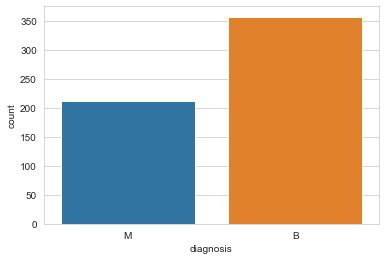

In [9]:
# Exploring the target variable
sns.countplot(x='diagnosis', data=data)
print(data['diagnosis'].value_counts())
plt.show();

The dependent variable "diagnosis" contains binary values: M (malignant) - 212 and B (benight) - 357.
Convert this diagnosis variable into binary

In [10]:
data['diagnosis']=np.where(data['diagnosis']=='M', 1, 0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Converted the diagnosis column into binary,  malignant as 1 and benign as 0.

### Step: 4 Model Building

Random Forest:  It is a supervised learning algorithm and capable of performing both regression and classification tasks.

Spliting the data into training and testing sets
Here we will split the data into two parts: training set (80%), and test set (20%).

In [11]:
# Spliting the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split (X, y,train_size = 0.8)
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (455, 30) (455,)
Shapes of X_test, y_test:  (114, 30) (114,)


In [12]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()

### K-fold cross validation:

In K-fold cv, training data is further split into K number of subsets, called folds, then iteratively fit the model k times, each time training the data on k-1 of the folds and evaluating on the kth fold. At the end, we average the the performance on each of the folds to come up with final validation metrics for the model.

In [13]:
# Validate the model's performance using k-fold cross validation
from sklearn.model_selection import cross_validate
cv = cross_validate (rfc1, X_train, y_train, cv = 10)

In [14]:
print("Accuracy score of 10-fold cross validation: ", cv['test_score'])
print("Accuracy mean score of CV: ", cv['test_score'].mean())

Accuracy score of 10-fold cross validation:  [0.95652174 0.95652174 0.97826087 0.95652174 1.         0.97777778
 0.91111111 0.95555556 0.95555556 0.95555556]
Accuracy mean score of CV:  0.9603381642512078


The base model performed quite well, with an accuracy score of 0.96 on the training set.
However, we still hope to improve the performance by tuning the hyperparameters.

### Hyper-Parameter tuning:

For hyperparameter tuning, we perform many iterations of the entire K-fold CV process, each time using different model settings.

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
random_grid = {'n_estimators' :[int(x) for x in np.linspace(start = 100, stop = 1000, num = 10, endpoint = True)],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': [int(x) for x in np.linspace(start = 3, stop = 36, num=33, endpoint = True)],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [3, 4, 5], 
             'bootstrap': ['True']}
print(pram_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [3, 4, 5], 'bootstrap': ['True']}


In [19]:
# Creating a base randomforest model for tuning
tune_base_rf = RandomForestClassifier(random_state=42)

# Create a randomized search cross validation model for searching for the best hyperparameters for the base rf model over 100 parameters combination
random_search_rf = RandomizedSearchCV (estimator=tune_base_rf, param_distributions  = random_grid, random_state=42, cv = 10, n_iter=100)

# fit the randomized search CV model into the training set
random_search_rf.fit(X_train, y_train)

# Print the best parameters
random_search_rf.best_params_

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': ['True'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29, 30, 31, 32, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
  

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 26,
 'bootstrap': 'True'}

From the above code we founf the best parameters for our tuned random forest. Will use these parameters to build the high performance model.

In [21]:
# Creating a tuned random forest model with the best parameters choosen by  the cv randomized search algorithm
tuned_rf = RandomForestClassifier (n_estimators = 100, min_samples_split = 5, min_samples_leaf = 3, max_features = 'auto',  max_depth = 26, bootstrap = True, random_state=42)

# Validating the model using k-fold cross validation (k=10)
tuned_cv = cross_validate (tuned_rf, X_train, y_train, cv = 10)
print("Accuracy score: ", tuned_cv['test_score'])
print("Accuracy mean score of CV: ", tuned_cv['test_score'].mean())

Accuracy score:  [0.93478261 0.97826087 0.97826087 0.95652174 0.95652174 0.97777778
 0.91111111 0.95555556 0.95555556 0.95555556]
Accuracy mean score of CV:  0.9559903381642512


The tuned model accuracy is 95.5% where the base model is 96.0%, the tuned model did not show to have better performance compared to the base model. Its beacuse of decreasing the maximum depths of trees in the tuned model.But still hyperparameters is useful for avoiding the overfitting or high variance of the model on the unseen data. Therefore, we decide to go with the tuned model as our final model.

### Step 4: Evaluating the selected model

    We use to accuracy score, confusion matrix, and ROC Curve to evaluate the model.

In [22]:
# Fit the selected model to the training set
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=26, min_samples_leaf=3, min_samples_split=5,
                       random_state=42)

In [33]:
# Applying the selected model to make prediction on the test set
pred = tuned_rf.predict(X_test)

# Observing the estimate probability of classess in the test set
pred_prob = tuned_rf.predict_proba (X_test)
print ('class_0','\t', 'class_1')
print(pred_prob[:5])

class_0 	 class_1
[[0.99333333 0.00666667]
 [0.97340476 0.02659524]
 [0.00333333 0.99666667]
 [0.96844444 0.03155556]
 [0.86806349 0.13193651]]


In the first instance, it was assigned class 0 because it got a probability is almost 1 and higher than the class_1.

In [34]:
# finding the acurracy scores for the tet set
print('Accuracy of the selected model in the test set: {:.4f}'.format(tuned_rf.score(X_test, y_test)))

Accuracy of the selected model in the test set: 0.9561


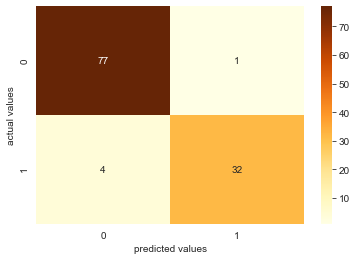

In [40]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred )
# visualizing confusion matrix
sns.heatmap(conf_matrix, annot = True)
plt.xlabel ('predicted values')
plt.ylabel ('actual values')

From the above confusion matrix, we can see among 104 instances in test set, our model correctly predict 82 Benign and 27 Malignant instances. It only incorrectly predict 4 instances which are actually Benign (FP), and 1 instance that is actually Maglignant (FN). Lower FN indicates that our model satisfy the cost requirement as mentioned previously.

### With the ROC curve

An ROC (Receiver Operating Characteristic Curve) is a graph showing the performance of a classification model at all classification thresholds.

Higher the AUC is, the better the model performs. The AUC is expected to greater than 0.5, or over left-top part compared to the baseline.

TPR: TPR is the probability that an actual positive will test positive.

        TPR = TP/P = TP/(TP+FN)

FPR: FPR is the model mistakenly predicted the positive class
        
        FPR = FP/N = FP/ (FP+TN)


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
# Taking the probability of the class_1 on the test set
pred_prob_c1 = pred_prob[:,1]

# Getting True Positive Rate (tpr) and False Positive Rate (fpr)
fpr, tpr, threshold = roc_curve (y_test,pred_prob_c1, pos_label = 1)

# Computing Area Under the ROC Curve (roc_auc)
roc_auc_score = roc_auc_score (y_test,pred_prob_c1)
roc_auc_score

0.9943019943019943

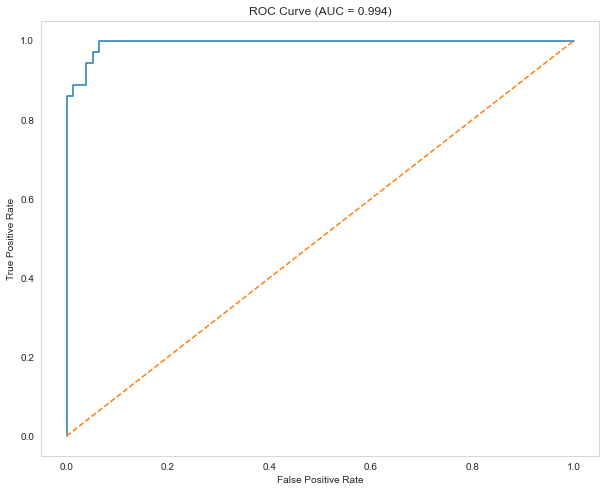

In [51]:
# Visualizing the ROC Curve
plt.subplots(figsize = (10,8))
plt.plot( fpr, tpr, label='Test AUC: %0.2f'%roc_auc_score)
plt.plot([0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ("ROC Curve (AUC = {:.3f})".format(roc_auc_score))
plt.grid()
plt.show();